## Finding Heavy Traffic Indicators on I-94
#### *By Naftali N Indongo*


### 1. Introduction

In this project We're going to analyze a dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94). John Hogue made the dataset available, and you can download it from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [50]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Reading in the dataset
i_94 = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [52]:
i_94.head() # The first five rows

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [53]:
i_94.tail() # The last five rows

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [54]:
i_94.info() # Information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset has 48,204 rows and 9 columns, and there are no missing values. Columns <font color='red'>holiday</font>, <font color='red'>weather_main</font>, <font color='red'>weather_description</font> and <font color='red'>date_time</font> object data type, meaning its values are stored as strings. Datas in columns <font color='blue'>temp</font>, <font color='blue'>rain_1h </font> and   <font color='blue'>snow_1h</font> are stored as floats. Lastly, values in the  <font color='green'>clouds_all </font> and <font color='green'>traffic_volume</font> are stored as integers.  Each row describes traffic and weather data for a specific hour — dated from 2012-10-02 09:00:00 to 2018-09-30 23:00:00.

### 2. Analyzing Traffic Volume

The [dataset documentation](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).
<img src="https://s3.amazonaws.com/dq-content/524/i94_figma.png" alt="Alt text that describes the graphic" title="Title text" />

This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.

In this exercise, we're going to plot a histogram to visualize the distribution of the <font color='red'>traffic_volume column</font>.


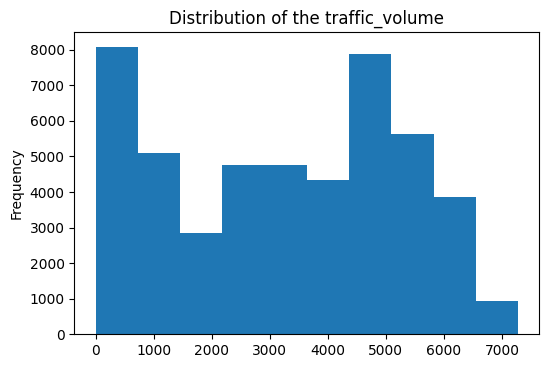

In [55]:
%matplotlib inline
i_94['traffic_volume'].plot.hist()
plt.title("Distribution of the traffic_volume")
plt.show()

In [56]:
i_94["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Looking at the histogram we generated for the <font color='red'>traffic_volume</font> column, we observe the following:

* Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars per hour.
* About 25% of the time, there were only 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. About half of the time, the traffic volume was atmost 3380 cars. However, about 25% of the time, the traffic volume was 4,933 cars or more (about four times as much).

Based on our observation daytime and nighttime influence the traffic volume. 

### 3. Traffic Volume: Day vs. Night

The possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data.

We'll start by dividing the dataset into two parts:

* Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
* Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.


In [57]:
i_94["date_time"] = pd.to_datetime(i_94["date_time"])
#Daytime data
daytime = i_94.copy()[(i_94['date_time'].dt.hour >= 7) & (i_94['date_time'].dt.hour < 19)]

#Nighttime data
nighttime = i_94.copy()[(i_94['date_time'].dt.hour >= 19) | (i_94['date_time'].dt.hour < 7)]

print("There are {} Daytime data points and {} Nighttime data points.".format(daytime.shape[0], nighttime.shape[0]))

There are 23877 Daytime data points and 24327 Nighttime data points.


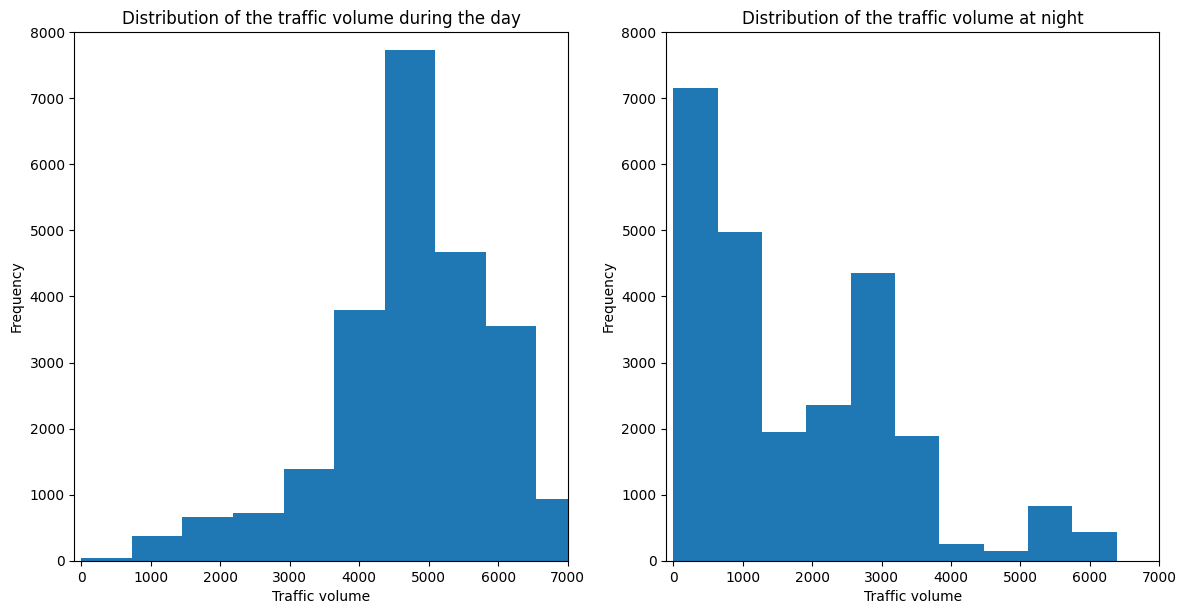

In [58]:
plt.figure(figsize =(14,7))
plt.subplot(1,2,1)
plt.hist(daytime['traffic_volume'])
plt.xlim(-100, 7000)
plt.ylim(0, 8000)
plt.title("Distribution of the traffic volume during the day")
plt.xlabel("Traffic volume")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(nighttime['traffic_volume'])
plt.xlim(-100, 7000)
plt.ylim(0, 8000)
plt.title("Distribution of the traffic volume at night")
plt.xlabel("Traffic volume")
plt.ylabel("Frequency")

plt.show()

In [59]:
# Statistics for the daytime traffic volume
daytime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Looking at the histogram we generated for the daytime traffic volume, we observe the following:
* The distribution of the traffic volume passing the station during during the day is left skewed. i.e. most of the traffic volumes are high.
* During the day, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 4762 cars per hour.
* There are more than 4252 cars passing through the station each hour 75% of the day time.

In [60]:
# Statistics for the nighttime traffic volume
nighttime['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

Looking at the histogram we generated for the nighttime traffic volume, we observe the following:
* The distribution of the traffic volume passing the station during the night is right skewed. i.e. most of the traffic volumes are low.
* During the night, the hourly traffic volume varied from 0 to 6386 cars, with an average of 1785 cars per hour.
* There are less than 2819 cars passing through the station each hour of the night time.

### 4. Time Indicators

Although there are still measurements of over 7,000 cars per hour during the night, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

* Month
* Day of the week
* Time of day

#### a) Time Indicators Part (I): Month
We used the code below to get the average traffic volume for each month.

In [61]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

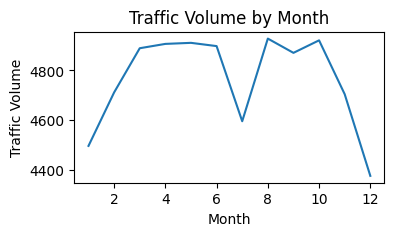

In [62]:
plt.figure(figsize=(4,2))
plt.plot(by_month['traffic_volume'])
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.title("Traffic Volume by Month")
plt.show()

From the line plot above, we observe that the traffic is heavy around March to June and August to October. That is possibly the time when it is warm. The traffic seems to be getting less heavy in July each year; which is seems odd, unless there is something special about july. Furthermore, the traffic volume looks less heavy during the cold months (November–February).

#### b) Time Indicators Part (II): Day of the week
We used the code below to get the average traffic volume for each day of the week.

In [63]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

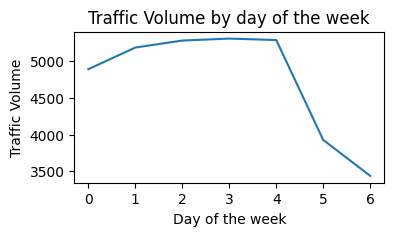

In [64]:
plt.figure(figsize=(4,2))
plt.plot(by_dayofweek['traffic_volume'])
plt.xlabel('Day of the week')
plt.ylabel('Traffic Volume')
plt.title("Traffic Volume by day of the week")
plt.show()

From line plot above, we observe that the traffic volume is significantly heavier on business days compared to the weekends.

#### c) Time Indicators: Part (III)

On the previous screen, we found that the traffic volume is significantly heavier on business days compared to the weekends.

We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

We used the code below to get the average traffic volume for each time of the day.

In [65]:
daytime['hour'] = daytime['date_time'].dt.hour
bussiness_days = daytime.copy()[daytime['dayofweek'] <= 4] # 4 == Friday
weekend = daytime.copy()[daytime['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print("")
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64

hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


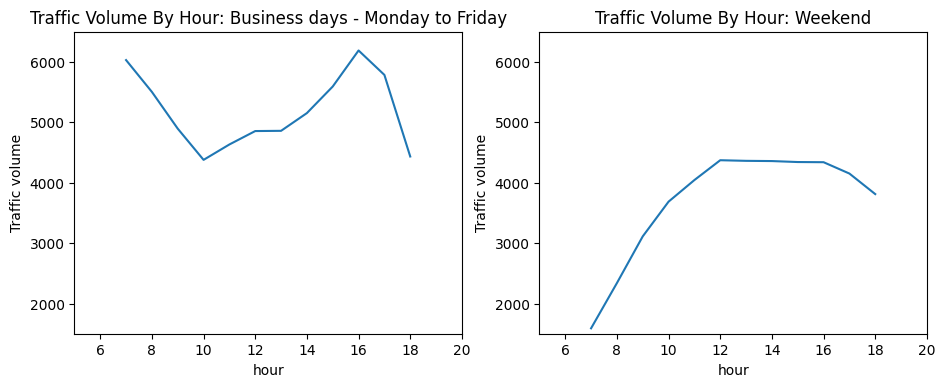

In [66]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(5,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Business days - Monday to Friday')
plt.ylabel('Traffic volume')

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(5,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')
plt.ylabel('Traffic volume')
plt.show()

At each hour of the day, the traffic volume is higher during business days compared to the weekends. The traffic is the highest around 7:00 and 16:00, which are the rush hours where mostt people are travelling from home to work and from work to home.

In summary, we found a few time-related indicators of heavy traffic:

* The traffic is usually heavier during warm months (March–October except July) compared to cold months (November–February).
* The traffic is usually heavier on business days compared to weekends.
* On business days, the rush hours are around 7:00 and 16:00.

### 5. Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather:  <font color='red'>temp</font>,  <font color='red'>rain_1h</font>,  <font color='red'>snow_1h</font>,  <font color='red'>clouds_all</font>,  <font color='red'>weather_main</font>,  <font color='red'>weather_description</font>.

A few of these columns are numerical so let's start by looking up their correlation values with <font color='red'>traffic_volume</font>.

In [67]:
daytime.corr()["traffic_volume"]

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Of all the weather columns, temperature shows the strongest correlation of +0.13 with traffic volume. 

Lets plot the scatter plot for temperature and <font color='red'>traffic_volume</font>.

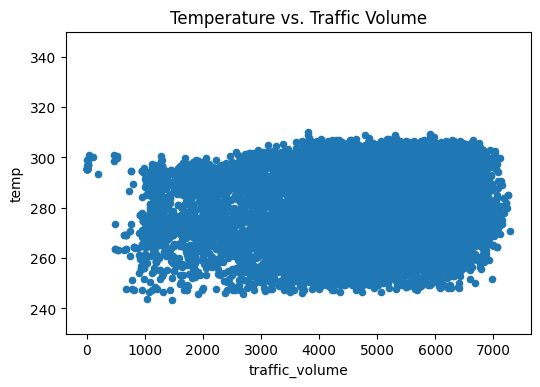

In [68]:
daytime.plot.scatter('traffic_volume','temp')
plt.ylim(230,350)
plt.title('Temperature vs. Traffic Volume')
plt.show()

Although, the temperature column shows the strongest correlation with traffic volume among other numerical weather columns it does not seem to be a solid indicator of heavy traffic. We need further look at other weather-related columns: weather_main and weather_description.

### 6. Weather Types

Previously, we examined the correlation between traffic_volume and the numerical weather columns. However, we didn't find any reliable indicator of heavy traffic.

To see if we can find more useful data, we'll look next at the categorical weather-related columns: <font color='red'>weather_main</font> and <font color='red'>weather_description</font>.

We're going to calculate the average traffic volume associated with each unique value in these two columns. We've already calculated the values for you — we grouped the data by <font color='red'>weather_main</font> and <font color='red'>weather_description</font> while using the mean as an aggregate function.


In [76]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_description = daytime.groupby('weather_description').mean()

Let's create a bar plot for the <font color='red'>traffic_volume</font><font column color='red'>weather_main</font> and <font color='red'>weather_description</font>.

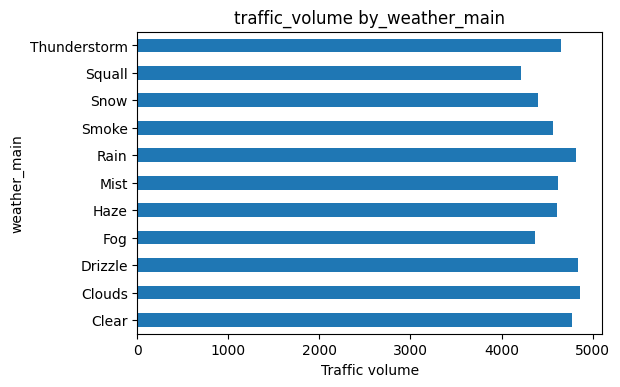

In [77]:
by_weather_main['traffic_volume'].plot.barh()
plt.title('traffic_volume by_weather_main')
plt.xlabel('Traffic volume')
plt.show()

From bar plot above, we make the following observations:
* There are no main weather indicators causing a traffic volume exceeding 5000 cars.
* Main weather by are sufficient enough to be indicators of heavy traffic.

We will further look at <font color='red'>weather_description</font> which has more reliable weatehr classifications.

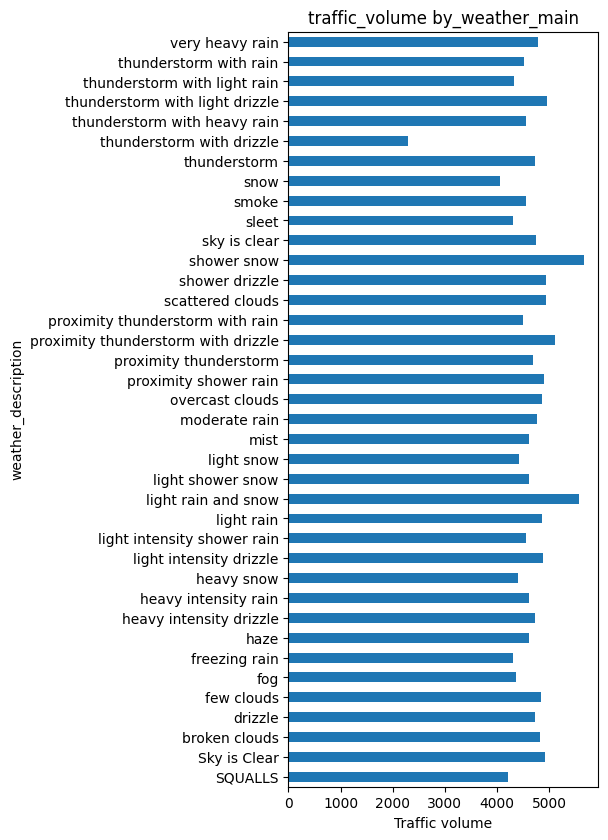

In [85]:
by_weather_description['traffic_volume'].plot.barh(figsize =(4,10))
plt.title('traffic_volume by_weather_main')
plt.xlabel('Traffic volume')
plt.show()

From bar plot above, we make the following observations:
*  The traffic volume exceed 5000 cars when there is shower snow,light rain and snow and proximity thunderstorm with drizzle
* It's not quite clear why such weather types have the highest average traffic values — these seems to be bad weather conditions, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

### 7. Conclusion

In conclusion, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators: Time indicators and Weather indicators. For time indicators, the following deductions were made: a) The traffic is usually heavier during warm months (March–October with an exception of july) compared to cold months (November–February), b) The traffic is usually heavier on business days compared to the weekends and c) On business days, the rush hours are around 7 and 16. The time indicators with the highest average traffic volume are shower snow, light rain and snow, and proximity thunderstorm with drizzle.

In addition, further investigation can be done to look heavy traffic indicators during the night time.